# Importing Data from Databases

## Introduction to databases

Relational databases underpin the information systems of many organizations.

Reading data froma a database is a two-step process. Connect and query.

### Connect to a database

In [8]:
from  sqlalchemy import create_engine
engine = create_engine("sqlite:///data.db")
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


### Load entire tables

In [9]:
import pandas as pd

print(engine.table_names())
hpd_calls = pd.read_sql("hpd311calls", engine)
print(hpd_calls.head())

query = """SELECT *
FROM weather"""
weather = pd.read_sql(query, engine)
print(weather.head())

['boro_census', 'hpd311calls', 'weather']
  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough  
0    2786 JEROME AVENUE        07 BRONX      BRONX  
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  
       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW000947

## Refining imports with SQL queries

### Selecting columns with SQL

In [10]:
query = """SELECT date, tmax, tmin
FROM weather;"""
temperature = pd.read_sql(query, engine)
temperature

date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]

### Selecting rows

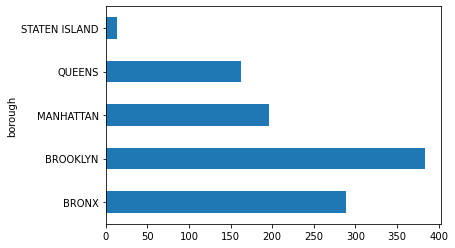

In [20]:
import matplotlib.pyplot as plt

query = """SELECT *
FROM hpd311calls
WHERE complaint_type='SAFETY'"""
safety_calls = pd.read_sql(query, engine)
call_counts=safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

### Filtering on multiple conditions

In [22]:
query = """SELECT *
FROM weather
WHERE tmax <= 32
OR snow >=1"""
wintry_days = pd.read_sql(query, engine)
print(wintry_days.describe())

           latitude     longitude     elevation       awnd      prcp  \
count  2.500000e+01  2.500000e+01  2.500000e+01  25.000000  25.00000   
mean   4.077898e+01 -7.396925e+01  4.270000e+01   7.739600   0.17600   
std    2.175584e-14  4.351168e-14  1.450389e-14   2.621778   0.36947   
min    4.077898e+01 -7.396925e+01  4.270000e+01   3.130000   0.00000   
25%    4.077898e+01 -7.396925e+01  4.270000e+01   5.820000   0.00000   
50%    4.077898e+01 -7.396925e+01  4.270000e+01   7.830000   0.00000   
75%    4.077898e+01 -7.396925e+01  4.270000e+01   9.170000   0.09000   
max    4.077898e+01 -7.396925e+01  4.270000e+01  12.970000   1.41000   

            snow       tmax       tmin  
count  25.000000  25.000000  25.000000  
mean    1.332000  27.320000  17.160000  
std     2.685256   7.122266   7.673982  
min     0.000000  13.000000   5.000000  
25%     0.000000  22.000000  11.000000  
50%     0.000000  28.000000  17.000000  
75%     1.200000  31.000000  20.000000  
max     9.800000  40.00

## More complex SQL queries

Aggregate funtions: AVG(), SUM(), MAX(), MIN(), COUNT().
Selecting the column that is used to group by is important.

### Getting distinct values

In [34]:
query = """SELECT DISTINCT borough, complaint_type
FROM hpd311calls;"""
issues_and_boros = pd.read_sql(query, engine)
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


### Counting in groups

Counting and grouping can be done by queries too.

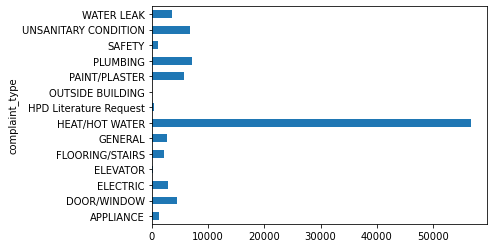

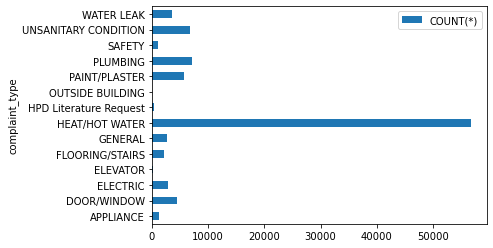

In [49]:
query = """SELECT complaint_type
FROM hpd311calls"""
calls_by_issue = pd.read_sql(query, engine)
call_counts = calls_by_issue.groupby("complaint_type")["complaint_type"].count()
call_counts.plot.barh()
plt.show()

# instead grouping and counting can be done with sql commands

query = """SELECT complaint_type, COUNT(*)
FROM hpd311calls
GROUP BY complaint_type"""
calls_by_issue = pd.read_sql(query, engine)
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

Calls about heat and hot water issues vastly outnumber calls about all other issues. The data subset in the table comes from the winter, so this makes sense.

### Working with aggregate functions

In [55]:
query = """SELECT month, MAX(tmax)
FROM weather
GROUP BY month;"""
weather_by_month = pd.read_sql(query, engine)
print(weather_by_month)

query = """SELECT month, MAX(tmax), MIN(tmin)
FROM weather
GROUP BY month;"""
weather_by_month = pd.read_sql(query, engine)
print(weather_by_month)

query = """SELECT month, MAX(tmax), MIN(tmin), SUM(prcp)
FROM weather
GROUP BY month;"""
weather_by_month = pd.read_sql(query, engine)
print(weather_by_month)

      month  MAX(tmax)
0  December         61
1  February         78
2   January         61
3     March         62
      month  MAX(tmax)  MIN(tmin)
0  December         61          9
1  February         78         16
2   January         61          5
3     March         62         27
      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


Aggregate functions can be a useful way to summarize large datasets.

## Loading multiple tables with joins

One feature of relational databases is that tables can be linked to one another via unique record identifiers or keys. So they can be combined with SQL joins.

In [71]:
query = """SELECT *
FROM hpd311calls
JOIN weather ON hpd311calls.created_date = weather.date
WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER';"""
join = pd.read_sql(query, engine)
print(join.head())
print()
# It is even possible to summarize data and then join additional columns.

query = """SELECT hpd311calls.borough, COUNT(*), boro_census.total_population,
boro_census.housing_units
FROM hpd311calls
JOIN boro_census ON hpd311calls.borough = boro_census.borough
GROUP BY hpd311calls.borough;"""
join = pd.read_sql(query, engine)
print(join.head())


  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
2   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
3   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   
4   38076151   01/01/2018    HPD  HEAT/HOT WATER        10463   

       incident_address community_board    borough      station  \
0    2786 JEROME AVENUE        07 BRONX      BRONX  USW00094728   
1  1235 GRAND CONCOURSE        04 BRONX      BRONX  USW00094728   
2  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  USW00094728   
3       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  USW00094728   
4    3810 BAILEY AVENUE        08 BRONX      BRONX  USW00094728   

                          name  ...  longitude  elevation        date  \
0  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  01/01/2018   
1  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  0

### Joining tables

Tables in relational databases usually have key columns of unique record identifiers. This lets us build pipelines that combine tables using SQL's JOIN operation, instead of having to combine data after importing it.



In [73]:
query = """SELECT *
FROM hpd311calls
JOIN weather ON hpd311calls.created_date = weather.date;"""

calls_with_weather = pd.read_sql(query, engine)
print(calls_with_weather.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough      station  \
0    2786 JEROME AVENUE        07 BRONX      BRONX  USW00094728   
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  USW00094728   
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  USW00094728   
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  USW00094728   
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  USW00094728   

                          name  ...  longitude  elevation        date  \
0  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  01/01/2018   
1  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  0

 The joins you perform in this course only return records whose key values appear in both tables, which is why the resulting data frames have values for all columns.

### Joining and filtering

In [80]:
query = """SELECT *, weather.prcp
FROM hpd311calls
JOIN weather ON hpd311calls.created_date = weather.date
;"""

leak_calls = pd.read_sql(query, engine)
print(leak_calls.head())
print("\n\n\n")
query = """SELECT *, weather.prcp
FROM hpd311calls
JOIN weather ON hpd311calls.created_date = weather.date
WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

leak_calls = pd.read_sql(query, engine)
print(leak_calls.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough      station  \
0    2786 JEROME AVENUE        07 BRONX      BRONX  USW00094728   
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  USW00094728   
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  USW00094728   
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  USW00094728   
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  USW00094728   

                          name  ...  elevation        date    month  awnd  \
0  NY CITY CENTRAL PARK, NY US  ...       42.7  01/01/2018  January  7.83   
1  NY CITY CENTRAL PARK, NY US  ...       42.7  01/0

### Joining, filtering, and aggregating

In [81]:
query = """SELECT hpd311calls.created_date, COUNT(*), weather.tmax, weather.tmin
FROM hpd311calls
JOIN weather ON hpd311calls.created_date = weather.date
WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER'
GROUP BY hpd311calls.created_date"""
df = pd.read_sql(query, engine)
print(df)

   created_date  COUNT(*)  tmax  tmin
0    01/01/2018      4597    19     7
1    01/02/2018      4362    26    13
2    01/03/2018      3045    30    16
3    01/04/2018      3374    29    19
4    01/05/2018      4333    19     9
5    01/06/2018      5327    13     6
6    01/07/2018      4352    18     5
7    01/08/2018      3096    31    17
8    01/09/2018      1618    44    30
9    01/10/2018      1269    43    30
10   01/11/2018       816    53    41
11   01/12/2018       628    61    44
12   01/13/2018      1161    58    19
13   01/14/2018      1949    25    15
14   01/15/2018      2095    30    16
15   01/17/2018      1238    36    22
16   01/18/2018      1267    32    18
17   01/19/2018       936    41    24
18   01/20/2018       698    52    38
19   01/21/2018       605    50    42
20   01/22/2018       708    49    38
21   01/23/2018       642    60    38
22   01/24/2018       906    44    27
23   01/25/2018      1154    34    23
24   01/26/2018       915    38    26
25   01/27/2